In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#from seaborn import heatmap

#from sklearn.model_selection import make_scorer
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import KFold, cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import mean_squared_error, make_scorer

In [27]:
df_raw = pd.read_csv('FMCG-Data/Project_Data_1.csv', low_memory=False,thousands=',')

In [28]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sales of Wheat in tons  207 non-null    object
 1   1990                    207 non-null    int64 
 2   1991                    207 non-null    int64 
 3   1992                    207 non-null    int64 
 4   1993                    207 non-null    int64 
 5   1994                    207 non-null    int64 
 6   1995                    207 non-null    int64 
 7   1996                    207 non-null    int64 
 8   1997                    207 non-null    int64 
 9   1998                    207 non-null    int64 
 10  1999                    207 non-null    int64 
 11  2000                    207 non-null    int64 
 12  2001                    207 non-null    int64 
 13  2002                    207 non-null    int64 
 14  2003                    207 non-null    int64 
 15  2004  

> # No missing values(null)

In [29]:
df_raw

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387


In [30]:
countries = df_raw['Sales of Wheat in tons'].copy()
df_sales = df_raw.drop('Sales of Wheat in tons', axis=1).copy()

In [32]:
for col in df_sales.columns:
    df_sales[col] = pd.to_numeric(df_sales[col])

In [33]:
df_sales.isnull().any()

1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
dtype: bool

I think KMeans algorithm is an appropriate one as implementing hierarchial clustering is not plausible in this case due to the amount of variables

In [36]:
scaler = MinMaxScaler()
scaler.fit(df_sales)
df_sales_scaled = scaler.transform(df_sales)

In [37]:
pca = PCA(n_components=0.97)
pca.fit(df_sales_scaled)
df_sales_scaled_pca = pca.transform(df_sales_scaled)

In [41]:
df_sales_scaled_pca.shape

(207, 4)

In [44]:
import time

In [48]:
sse = {}
clusters = None
start_time = time.time()
for k in range(1,11):
    
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_sales_scaled_pca)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    print(f'iter {k} | Total Time: {time.time()-start_time}')

iter 1 | Total Time: 0.5769968032836914
iter 2 | Total Time: 0.6030011177062988
iter 3 | Total Time: 0.6319983005523682
iter 4 | Total Time: 0.6640019416809082
iter 5 | Total Time: 0.7200076580047607
iter 6 | Total Time: 0.7939956188201904
iter 7 | Total Time: 0.8410003185272217
iter 8 | Total Time: 0.9029970169067383
iter 9 | Total Time: 0.962998628616333
iter 10 | Total Time: 1.0239982604980469


Text(0, 0.5, 'SSE')

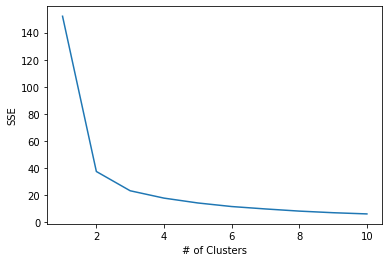

In [50]:
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('# of Clusters')
plt.ylabel('SSE')

# Choosing 3 as my optimal K

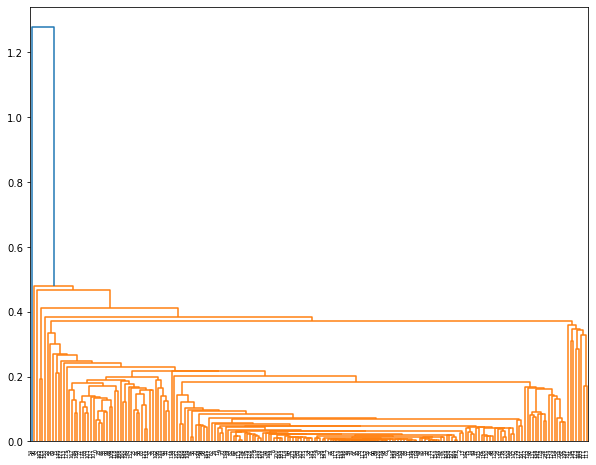

In [56]:
linked = linkage(df_sales_scaled_pca)

plt.figure(figsize=(10,8))
dendrogram(linked)
plt.show()

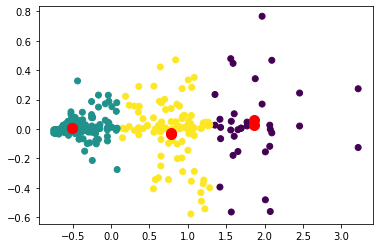

In [105]:
kmeans = KMeans(n_clusters=3).fit(df_sales_scaled_pca)
cma = kmeans.labels_
plt.scatter(df_sales_scaled_pca[:,0], df_sales_scaled_pca[:,1], c=cma)
plt.scatter(df_sales_scaled_pca[:,0], df_sales_scaled_pca[:,3], c=cma)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c='red', s=100)

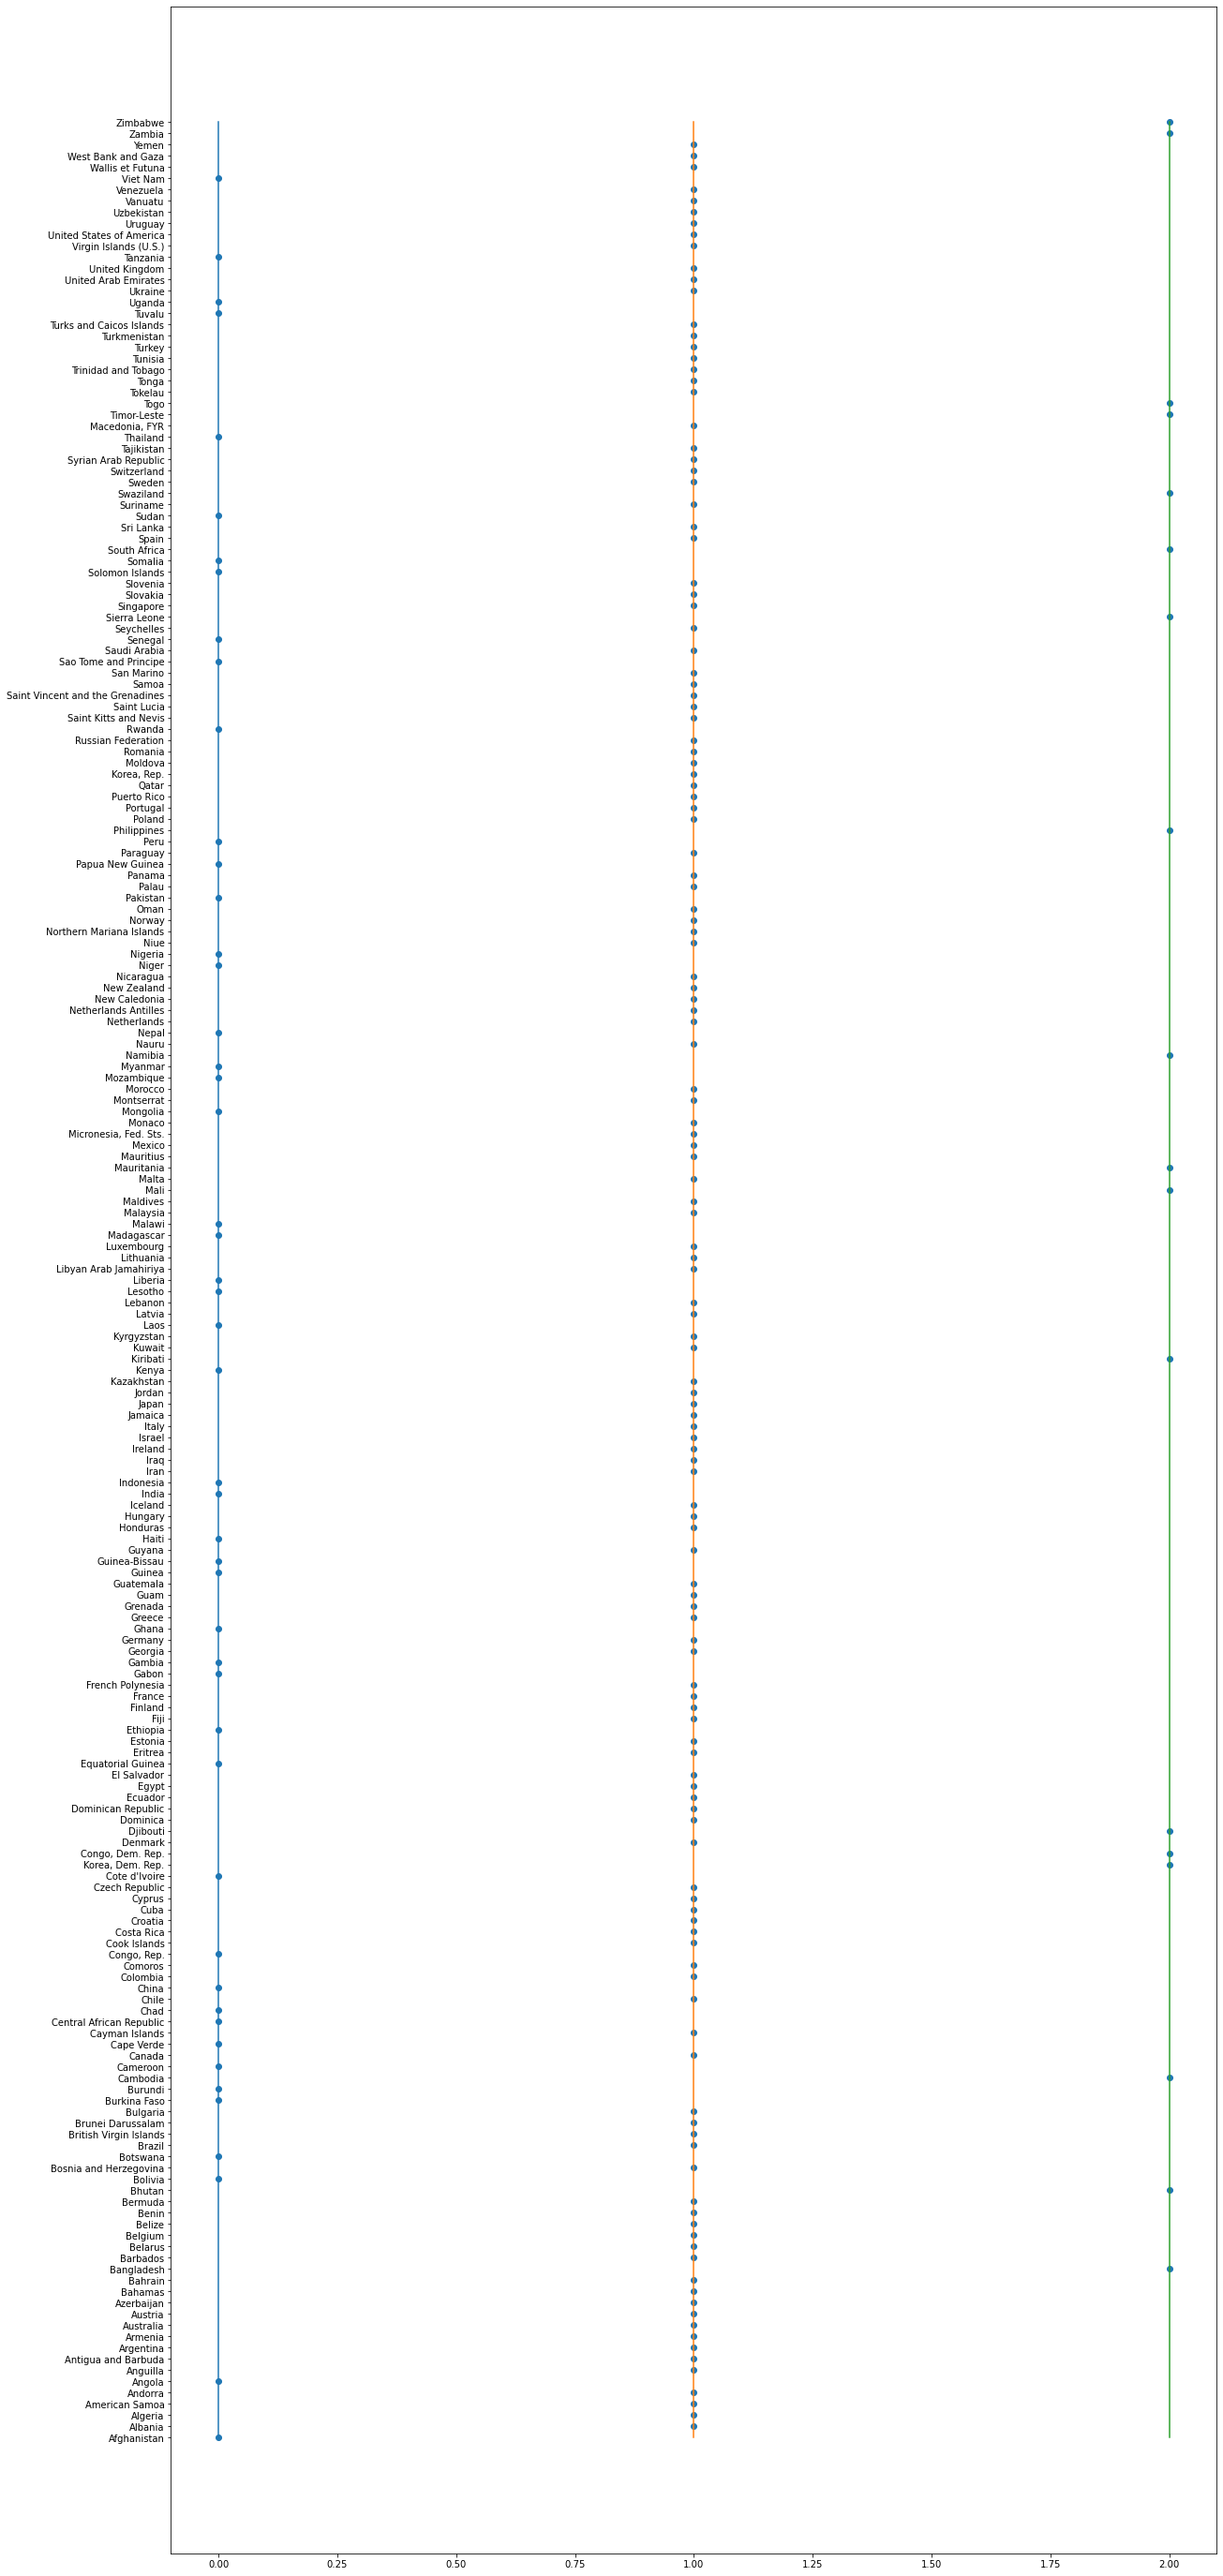

In [93]:
plt.figure(figsize=(20,50))
plt.scatter(cma, countries)
for cluster in range(max(cma)+1):
    plt.plot([cluster for i in range(len(countries))], range(len(countries)))